In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv('US Superstore data.csv')

In [5]:
df.shape

(9994, 21)

In [8]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

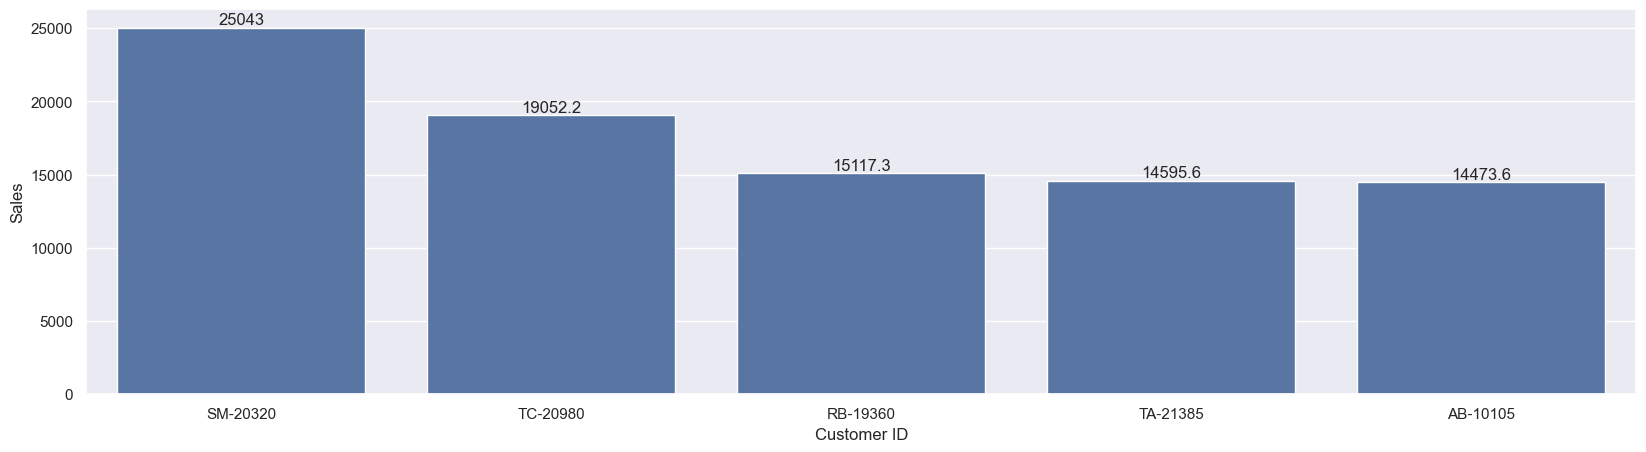

In [66]:
valuable_custmer= df.groupby('Customer ID', as_index= False)['Sales'].sum().sort_values(by='Sales',ascending= False).head(5)
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(x='Customer ID',y='Sales', data= valuable_custmer)
for bars in ax.containers:
    ax.bar_label(bars)


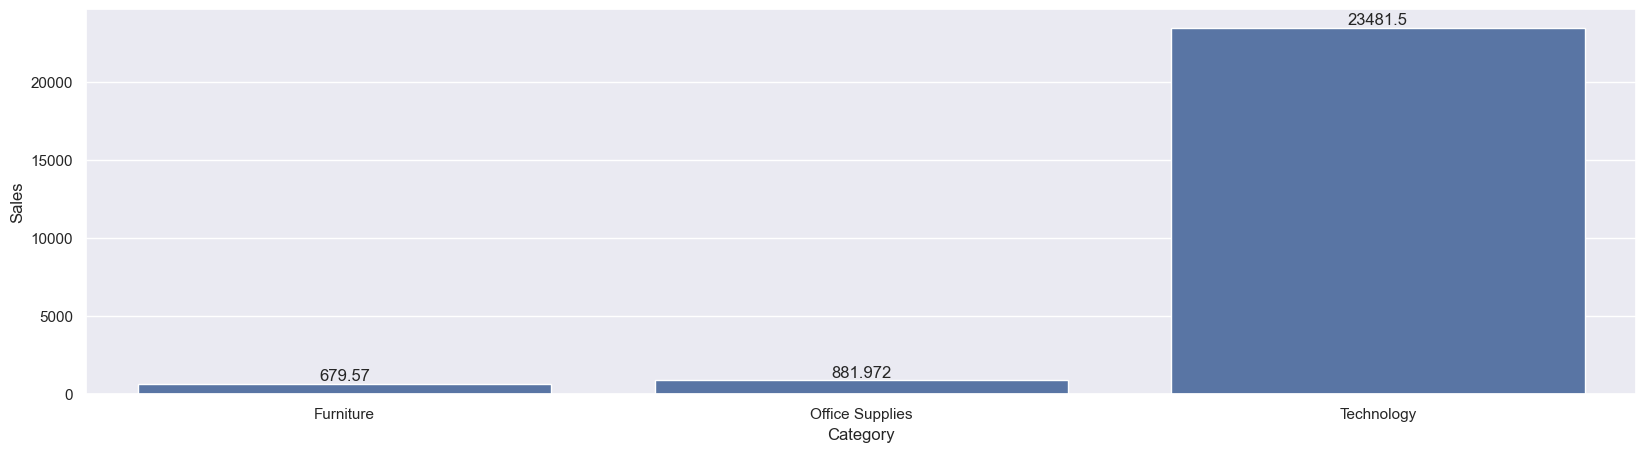

In [46]:
customer= df[df['Customer ID']=='SM-20320'].groupby('Category', as_index= False)['Sales'].sum()
ax=sns.barplot(x='Category',y='Sales', data=customer)
for bars in ax.containers:
    ax.bar_label(bars)

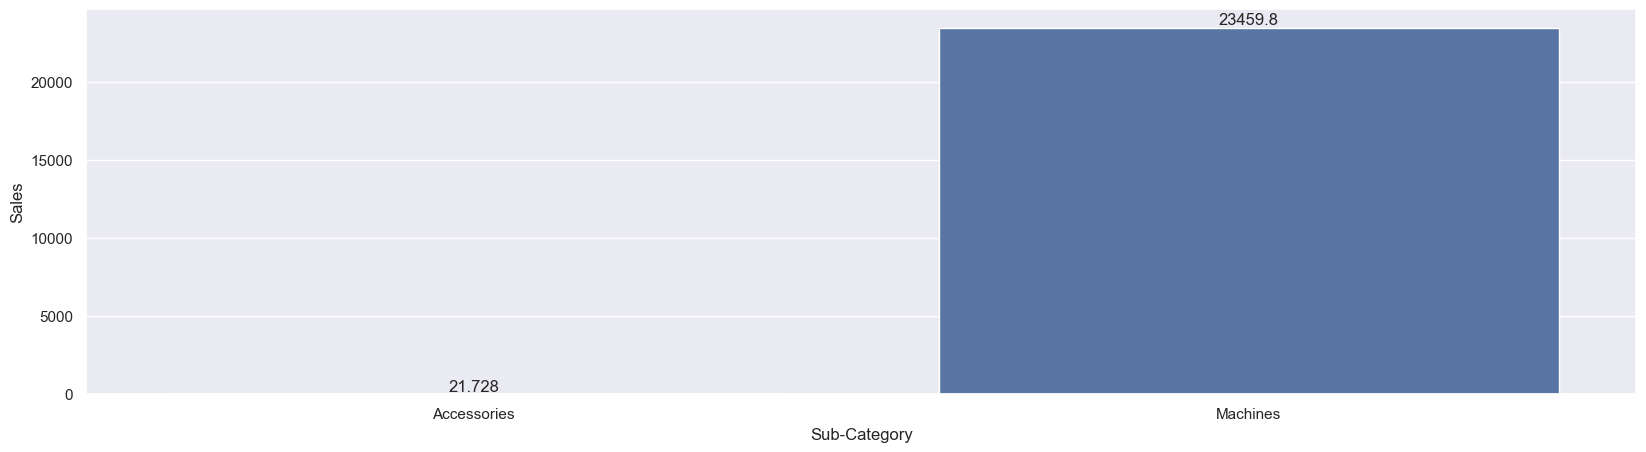

In [53]:
topCustomerIntrests= df[(df['Customer ID']=='SM-20320')&(df['Category']=='Technology')].groupby('Sub-Category', as_index= False)['Sales'].sum()
ax= sns.barplot(x='Sub-Category', y='Sales', data= topCustomerIntrests)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Customer ID', ylabel='Sales'>

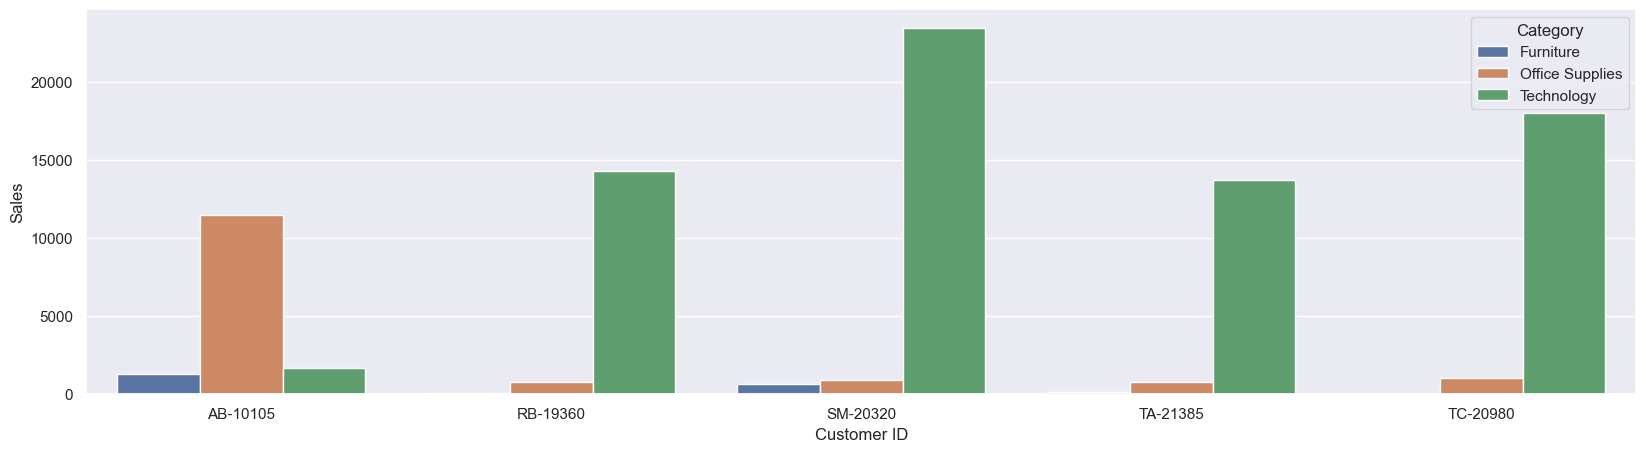

In [84]:
total_spending= df.groupby('Customer ID', as_index= False)['Sales'].sum()
total_spending= total_spending.sort_values(by='Sales', ascending= False).head(5)
top5= df[df['Customer ID'].isin(total_spending['Customer ID'])]
top5spending= top5.groupby(['Customer ID', 'Category'], as_index=False)['Sales'].sum()
sns.barplot(x='Customer ID', y='Sales', hue='Category', data= top5spending)

In [87]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<Axes: xlabel='Sub-Category', ylabel='Sales'>

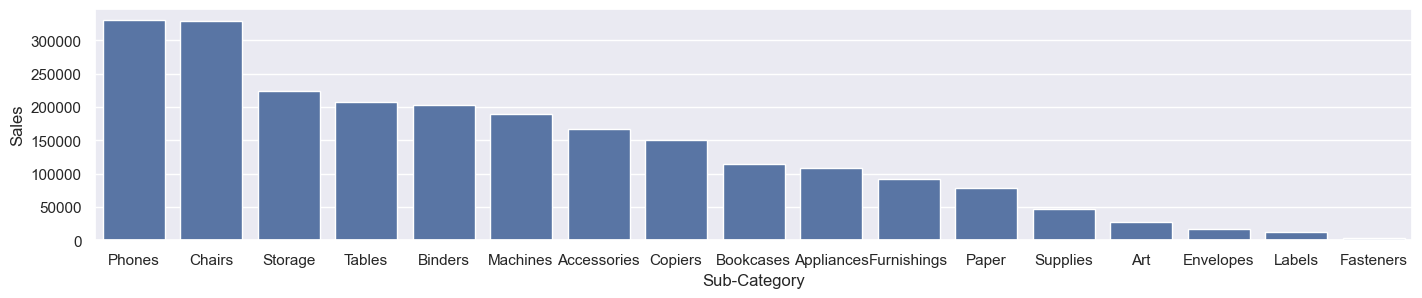

In [15]:
totalSale=df.groupby('Sub-Category', as_index= False)['Sales'].sum().sort_values(by='Sales', ascending= False)
sns.set(rc={'figure.figsize': (17,3)})
sns.barplot(x='Sub-Category', y='Sales', data= totalSale)

In [19]:
df['Profit Bin']=pd.cut(df['Profit'], bins=10)
pivot_table= df.pivot_table(index='Discount', columns='Profit Bin', values= 'Sales', aggfunc='sum')
pivot_table

C:\Users\mayan\AppData\Local\Temp\ipykernel_10584\2982042393.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table= df.pivot_table(index='Discount', columns='Profit Bin', values= 'Sales', aggfunc='sum')


Profit Bin,"(-6614.978, -5099.983]","(-5099.983, -3599.987]","(-3599.987, -2099.992]","(-2099.992, -599.996]","(-599.996, 899.999]","(899.999, 2399.994]","(2399.994, 3899.99]","(3899.99, 5399.985]","(5399.985, 6899.981]","(6899.981, 8399.976]"
Discount,,,,,,,,,,
0.00,0.000,0.000,0.000,0.000,908870.0100,86847.190,30848.7,29842.660,13999.96,17499.95
0.10,0.000,0.000,0.000,0.000,54369.3510,0.000,0.0,0.000,0.00,0.00
0.15,0.000,0.000,0.000,0.000,27558.5215,0.000,0.0,0.000,0.00,0.00
0.20,0.000,0.000,0.000,8593.808,702769.8880,42030.704,0.0,11199.968,0.00,0.00
0.30,0.000,0.000,0.000,4416.174,98810.4810,0.000,0.0,0.000,0.00,0.00
0.32,0.000,0.000,0.000,0.000,14493.4588,0.000,0.0,0.000,0.00,0.00
0.40,0.000,0.000,0.000,21915.636,86102.1720,8399.976,0.0,0.000,0.00,0.00
0.45,0.000,0.000,0.000,0.000,5484.9740,0.000,0.0,0.000,0.00,0.00
0.50,0.000,7999.980,0.000,29619.525,21299.0350,0.000,0.0,0.000,0.00,0.00


<Axes: xlabel='Profit Bin', ylabel='Discount'>

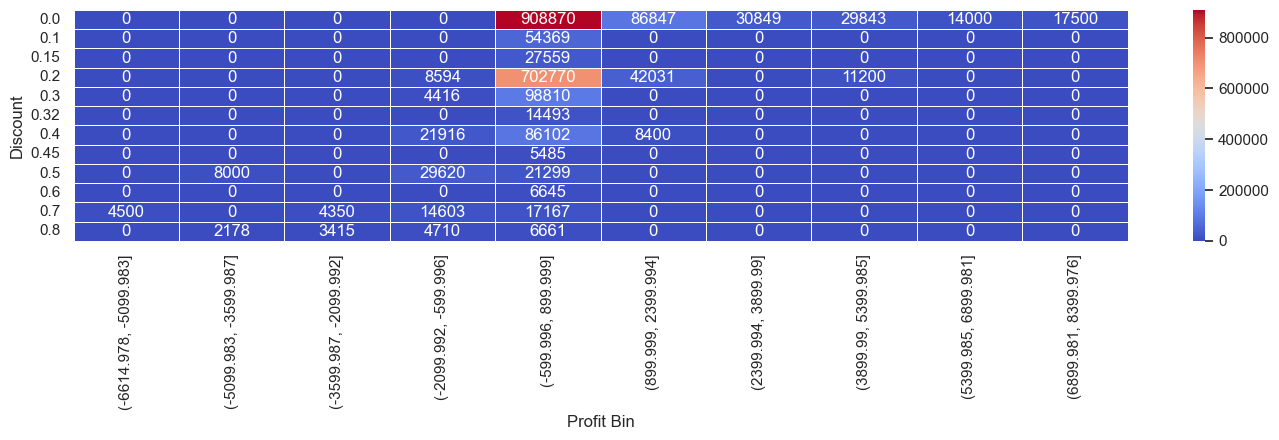

In [22]:
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)

C:\Users\mayan\AppData\Local\Temp\ipykernel_19840\2408493931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit_Data', data= categoryMean, palette='Blues_d')


<Axes: xlabel='Category', ylabel='Profit_Data'>

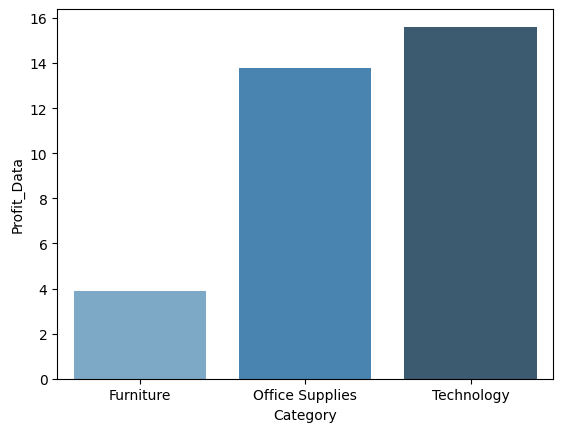

In [7]:
df['Profit_Data'] = (df['Profit'] / df['Sales']) * 100 
categoryMean= df.groupby('Category', as_index= False)["Profit_Data"].mean()
sns.barplot(x='Category', y='Profit_Data', data= categoryMean, palette='Blues_d')

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Proft_Data,Profit_Data
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,16.00
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,30.00
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,47.00
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,-40.00
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,11.25


<Axes: xlabel='Product ID', ylabel='count'>

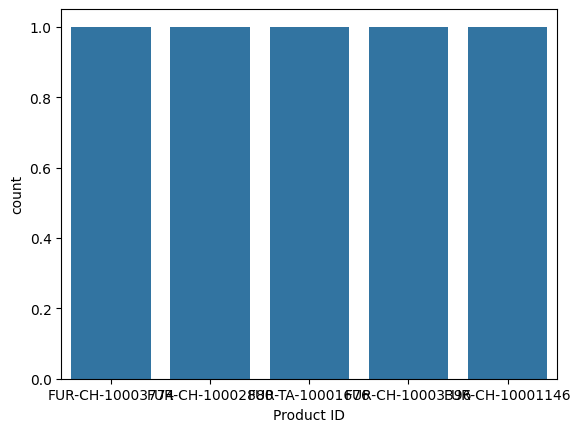

In [15]:
mask= df['Profit']<0
count_product=df[mask].groupby('Product ID', as_index= False).size().rename(columns={'size': 'Negative_Profit_Count'})
profitCount= count_product.sort_values(by='Negative_Profit_Count', ascending= False).head()
sns.countplot(x='Product ID', data=profitCount)

In [16]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Proft_Data,Profit_Data
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,16.00
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,30.00
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,47.00
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,-40.00
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,11.25


<Axes: xlabel='Customer ID', ylabel='Sales'>

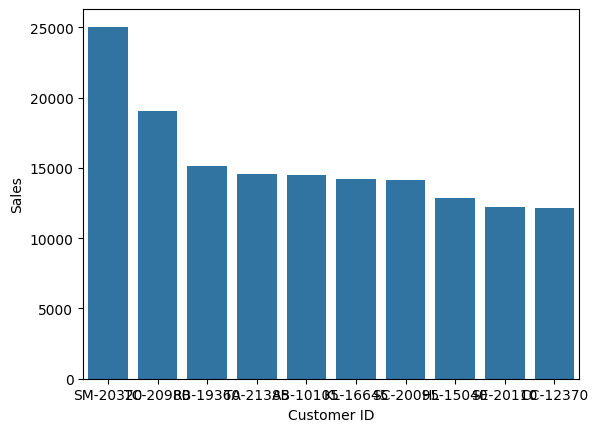

In [17]:
total=df.groupby('Customer ID', as_index= False)['Sales'].sum().sort_values(by= "Sales", ascending= False).head(10)
sns.barplot(x='Customer ID', y='Sales', data=total)

In [41]:
amount=df.groupby('Quantity', as_index= False)['Quantity'].count()
amount

,Quantity
0,899
1,2402
2,2409
3,1191
4,1230
5,572
6,606
7,257
8,258
9,57


C:\Users\mayan\AppData\Local\Temp\ipykernel_19840\646570844.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table= df.pivot_table(index= 'Segment', columns= 'Quantity_Bin', values='Quantity', aggfunc='sum')


<Axes: xlabel='Quantity_Bin', ylabel='Segment'>

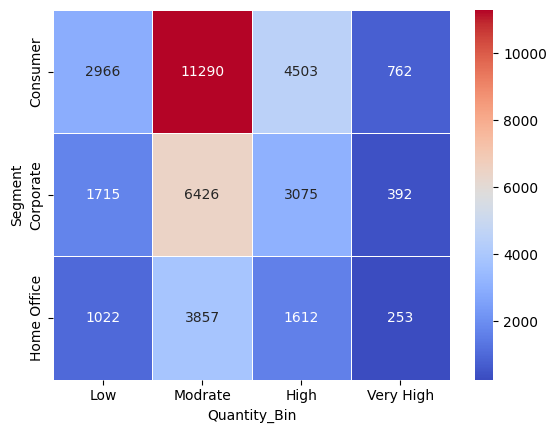

In [53]:
amount=df.groupby('Quantity')['Quantity'].count()
quantity= df.groupby('Segment')['Quantity'].sum()
bin2 = [-float('inf'), 3, 7, 11, float('inf')]
bin_label=['Low','Modrate','High','Very High']
df['Quantity_Bin'] = pd.cut(df['Quantity'], bins=bin2, labels=bin_label, right=False)
table= df.pivot_table(index= 'Segment', columns= 'Quantity_Bin', values='Quantity', aggfunc='sum')
sns.heatmap(table,cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)


In [54]:
grup= df.groupby('Category')['Sales'].mean()


Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64

([<matplotlib.patches.Wedge at 0x27c7dff0690>,
 [Text(-0.8899187390319623, 0.6465637152823859, 'Second Class'),
  Text(0.8899186414035474, -0.6465638496563697, 'Standard Class')],
 [Text(-0.4854102212901612, 0.3526711174267559, '30.0%'),
  Text(0.4854101680382985, -0.3526711907216562, '70.0%')])

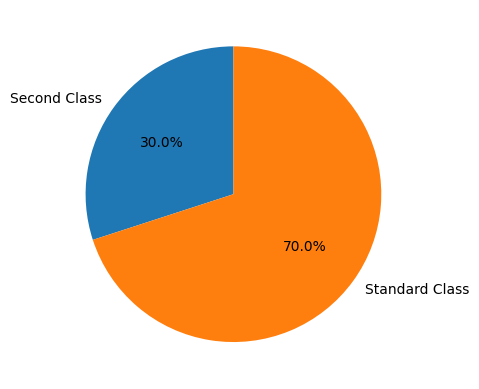

In [83]:
high_profits= df['Profit'].sort_values(ascending= False).reset_index().head(10)
high_profits['Ship Mode']= df['Ship Mode'].head(10)
a=high_profits.groupby('Ship Mode')['Ship Mode'].count()
plt.pie(a, labels= a.index, autopct='%1.1f%%', startangle=90)





In [84]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Proft_Data,Profit_Data,Profit_bin,Quantity_Bin
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,16.00,NaN,Low
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,30.00,Modrate,Modrate
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,47.00,Very High,Low
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,-40.00,Very High,Modrate
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,11.25,Modrate,Low


In [98]:
sales= df.groupby('City')['Sales'].sum().sort_values(ascending= False)
profits=df.groupby('City')['Profit'].sum().sort_values(ascending=False)
dataset= sales+profits
df_combined= pd.DataFrame({
    'Sales': sales,
    'Profits': profits
})





TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [109]:

pivit= df.pivot_table(index= 'City', columns='Quantity_Bin', values='Quantity',aggfunc='sum').sort_values(by='Quantity',ascending=False).head()
sns.heatmap(pivit,cmap='coolwarm', annot=True,fmt=".0f", linewidths=0.5 )

C:\Users\mayan\AppData\Local\Temp\ipykernel_19840\2180880451.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivit= df.pivot_table(index= 'City', columns='Quantity_Bin', values='Quantity',aggfunc='sum').sort_values(by='Quantity',ascending=False).head()


KeyError: 'Quantity'

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df[df['Discount']>0].groupby('City').count().sort_values(by='Discount', ascending= False)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
City,,,,,,,,,,,,,,,,,,,,
Philadelphia,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537,537
Houston,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377
Chicago,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314
Los Angeles,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281,281
New York City,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thousand Oaks,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Trenton,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Twin Falls,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df['Order Date']= pd.to_datetime(df['Order Date'])
df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month
df['Year-Month']= df['Order Date'].dt.to_period('M')
trend_data= df.groupby('Year-Month')agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
sns.lineplot(data= trend_data, x='Year-Month', y='Sales', marker='o', label='Sales', colour='blue')
sns.lineplot()

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [10]:
df['Order Date']= pd.to_datetime(df['Order Date'])
df.loc[0, 'Order Date'].day_name()
flter= df['Order Date']>=2015 & df['Order Date']<=2015
flter

TypeError: unsupported operand type(s) for &: 'int' and 'DatetimeArray'